# 분류 문제해결

In [4]:
import pandas as pd
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()

In [6]:
target_names = wine.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
# 데이터프레임 변환
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# 타겟(정답 레이블) 추가
df['target'] = wine.target

# 결과 출력
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [13]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False



['Malgun Gothic']


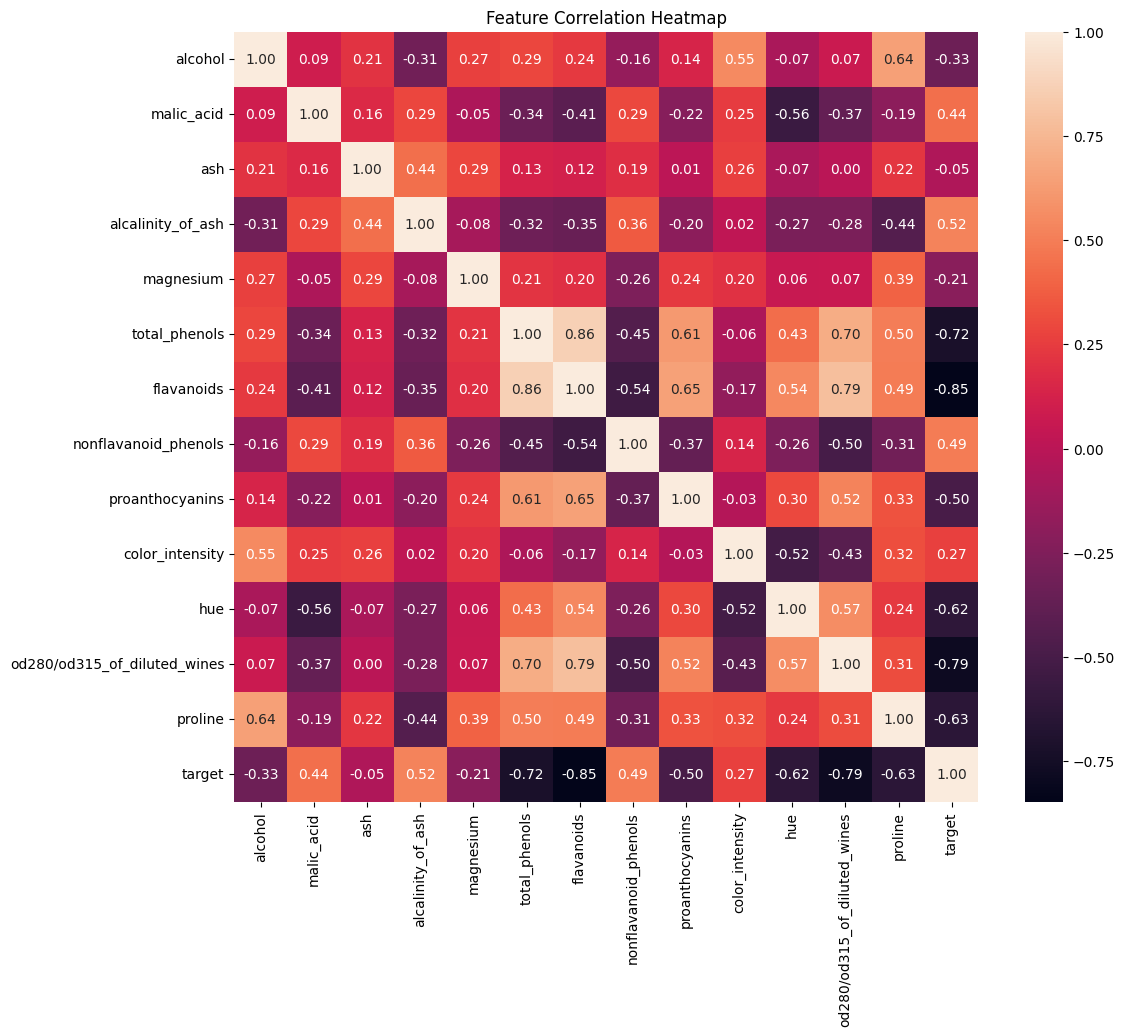

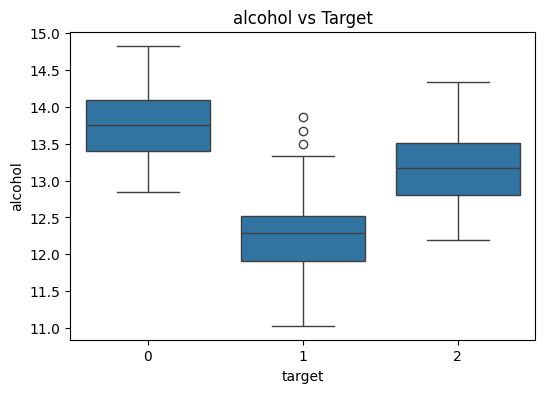

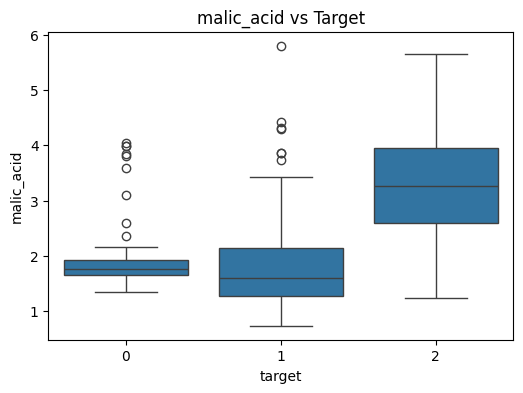

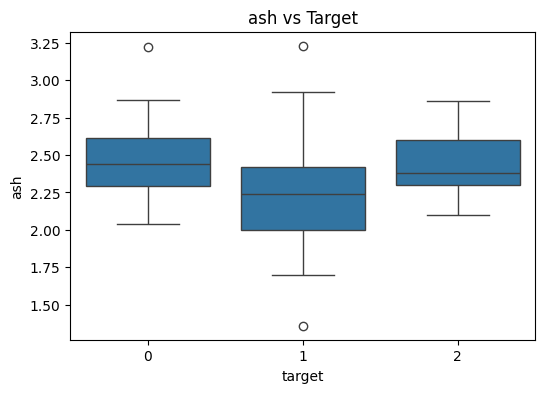

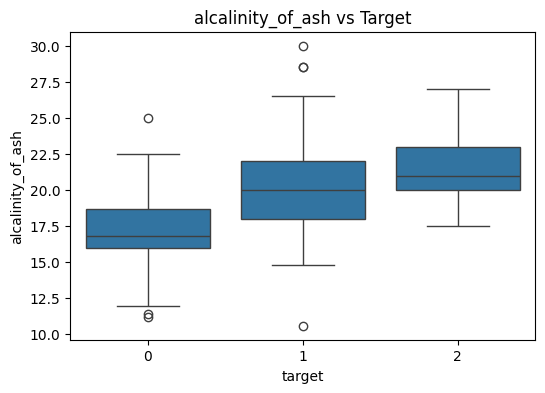

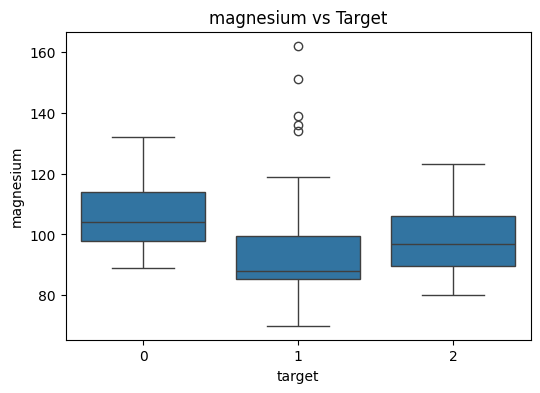

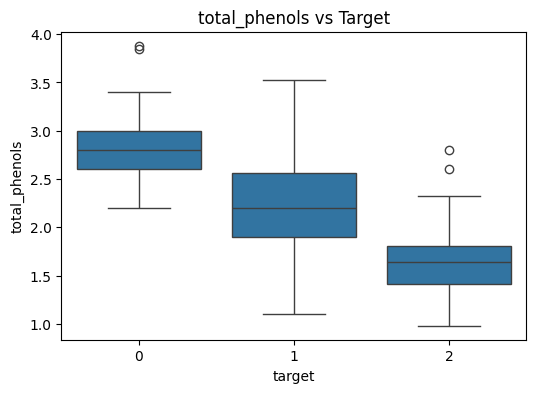

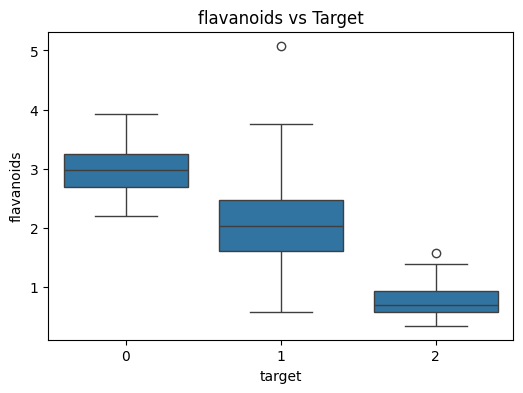

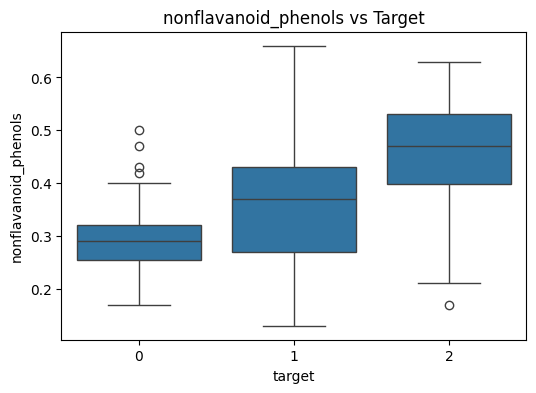

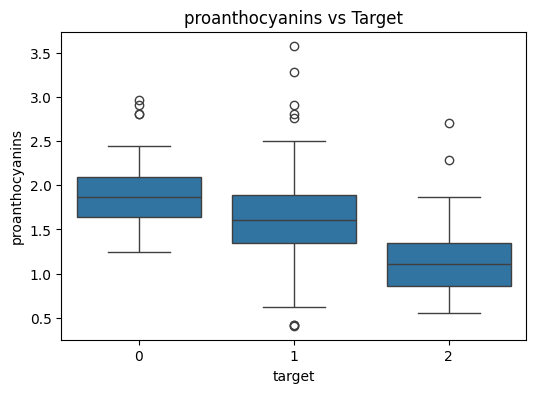

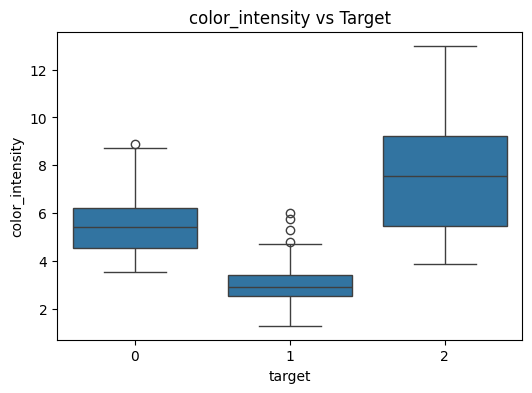

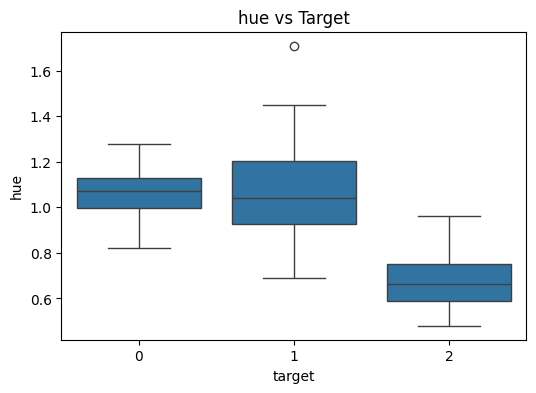

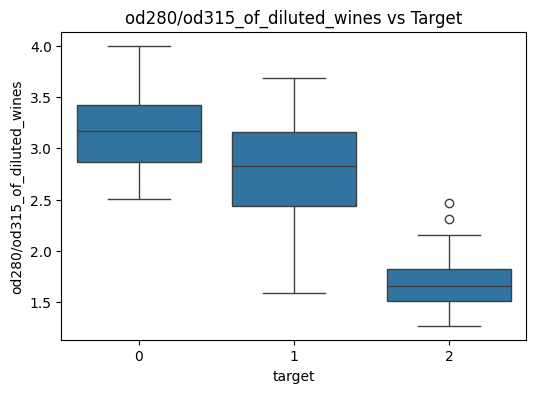

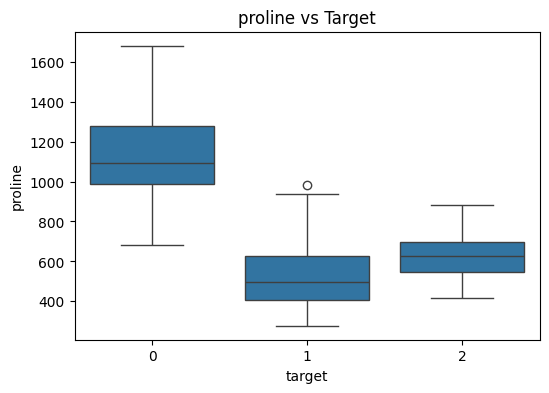

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 피쳐 간 상관관계
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# 각 feature와 target과의 관계
for feature in wine.feature_names:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
    plt.show()


# from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

sns.countplot(x = y_train)
plt.show()


In [18]:
X_train.shape, y_train.shape

((142, 13), (142,))

In [19]:
X_test.shape, y_test.shape

((36, 13), (36,))

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc

DecisionTreeClassifier(random_state=0)

In [23]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y_pred = model_dtc.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2])

In [25]:
from sklearn.metrics import classification_report, accuracy_score

In [26]:
y_pred[:5]

array([0, 2, 0, 0, 1])

In [27]:
y_test[:5].values

array([0, 2, 0, 1, 1])

In [28]:
accuracy_score(y_test, y_pred)

0.9444444444444444

In [29]:
# Predict를 수행하고 classification_report() 결과 출력
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



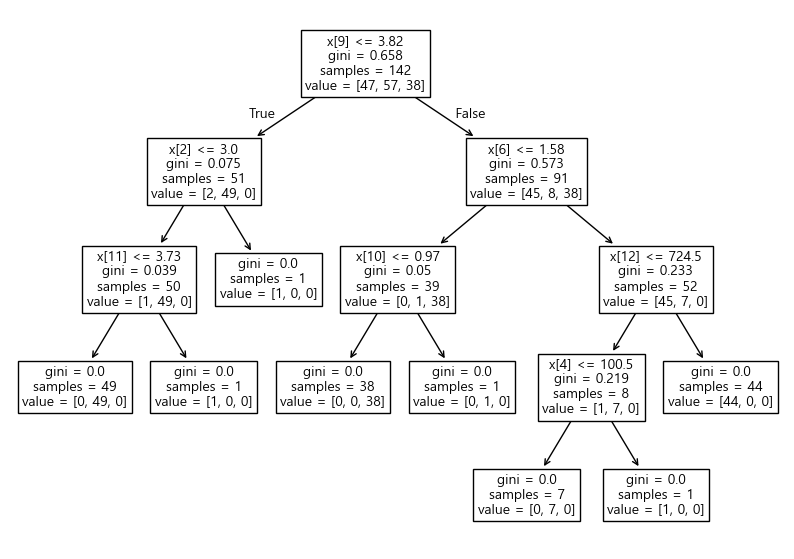

In [30]:
import matplotlib.pyplot as plt
# DT 시각화 함수
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))

# plot_tree(DT 학습모델)
plot_tree(model_dtc)
plt.show()

In [33]:
# 모델 만들고, 테스트, 성능평가
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.88      1.00      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
# model_lr = LogisticRegression(max_iter=500)
# multi_class : 'auto', 'ovr', 'multinomial'
# model_lr = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', )
model_lr = LogisticRegression(max_iter=500, multi_class='auto', solver='lbfgs')

In [38]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='auto')

In [39]:
pred_lr = model_lr.predict(X_test)

In [40]:
pred_lr[:5]

array([0, 2, 0, 1, 1])

In [41]:
y_test[:5]

10     0
134    2
28     0
121    1
62     1
Name: target, dtype: int64

In [42]:
from sklearn.metrics import classification_report, accuracy_score

In [43]:
accuracy_score(y_test, pred_lr)

0.9722222222222222

In [44]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [45]:
# 공식문서 예제
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_test[:4]))
print(clf.predict_proba(X_test[:4]))  # 확률값
print(clf.score(X_test, y_test))  # 정확도

[0 2 0 1]
[[9.99621559e-01 1.91728006e-06 3.76523628e-04]
 [7.51776224e-02 7.78138845e-02 8.47008493e-01]
 [8.87600155e-01 1.09088273e-01 3.31157249e-03]
 [5.22375680e-03 9.92185734e-01 2.59050928e-03]]
0.9722222222222222


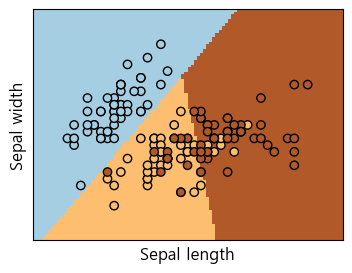

In [46]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
# 정규화는 머신러닝 모델이 **과적합(Overfitting)**되는 것을 방지하기 위한 기법
# C : 정규화 강도 - L2 정규화, 값이 작을 수록 패널티가 커져서 가중치가 작아짐
# C=0.000002 <- 더 강한 정규화
# logreg = LogisticRegression(C=0.000002, max_iter=500, multi_class='auto', solver='lbfgs') 
# C=100000 <- 약한 패널티
logreg = LogisticRegression(C=100000, max_iter=500, multi_class='auto', solver='lbfgs')
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
from sklearn.linear_model import SGDClassifier

In [48]:
model_sgd = SGDClassifier()

In [49]:
model_sgd.fit(X_train, y_train)

SGDClassifier()

In [50]:
pred_sgd = model_sgd.predict(X_test)
pred_sgd

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [51]:
from sklearn.metrics import classification_report, accuracy_score

In [52]:
accuracy_score(y_test, pred_sgd)

0.6944444444444444

In [53]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.61      1.00      0.76        14
           2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.48      0.64      0.55        36
weighted avg       0.52      0.69      0.59        36



In [54]:
#model_sgd = SGDClassifier(penalty='elasticnet', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
# model_sgd = SGDClassifier(penalty='l2', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd = SGDClassifier(penalty='l1', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd

SGDClassifier(n_jobs=-1, penalty='l1', random_state=20)

In [55]:
model_sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=20)

In [56]:
pred_sgd = model_sgd.predict(X_test)

In [57]:
pred_sgd[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [58]:
from sklearn.metrics import classification_report, accuracy_score

In [59]:
accuracy_score(y_test, pred_sgd)

0.6666666666666666

In [60]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.54      1.00      0.70        14
           2       0.00      0.00      0.00        10

    accuracy                           0.67        36
   macro avg       0.51      0.61      0.54        36
weighted avg       0.54      0.67      0.58        36



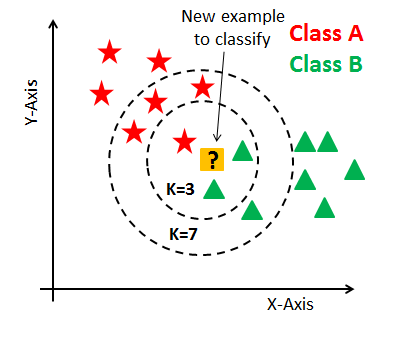

In [61]:
from IPython.display import Image
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model_knc = KNeighborsClassifier()
model_knc  # n_neighbors=5 일반적으로 홀수 값으로 설정

KNeighborsClassifier()

In [64]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
pred_knc = model_knc.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, accuracy_score

In [67]:
accuracy_score(y_test, pred_knc)

0.8055555555555556

In [68]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      0.71      0.74        14
           2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



In [69]:
model_knc = KNeighborsClassifier(n_neighbors=7, leaf_size=20)
model_knc.fit(X_train, y_train)
pred_knc = model_knc.predict(X_test)
print(y_test)
print(pred_knc)

10     0
134    2
28     0
121    1
62     1
51     0
7      0
66     1
129    1
166    2
102    1
143    2
42     0
130    2
14     0
108    1
105    1
20     0
100    1
38     0
93     1
60     1
22     0
18     0
98     1
64     1
58     0
132    2
112    1
155    2
48     0
176    2
94     1
177    2
164    2
173    2
Name: target, dtype: int64
[0 2 0 1 2 0 0 1 2 2 1 1 0 2 0 1 1 0 2 0 1 2 0 0 2 1 0 1 2 2 0 0 1 1 2 2]


In [70]:
accuracy_score(y_test, pred_knc)

0.7222222222222222

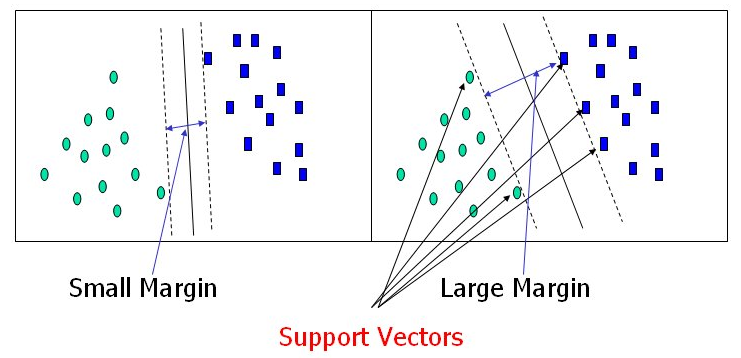

In [71]:
from IPython.display import Image
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [72]:
from sklearn.svm import SVC

In [73]:
model_svc = SVC(kernel="linear", C=10)
model_svc

SVC(C=10, kernel='linear')

In [75]:
model_svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [76]:
pred_svc = model_svc.predict(X_test)

In [77]:
pred_svc

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2])

In [78]:
from sklearn.metrics import classification_report, accuracy_score

In [79]:
accuracy_score(y_test, pred_svc)

0.9166666666666666

In [80]:
pred_svc[:5]

array([0, 1, 0, 0, 1])

In [81]:
# 클래스를 분류한 확률 정보 확인
model_svc.decision_function(X_test)[:5]

array([[ 2.29074987, -0.28073921,  0.80053966],
       [-0.25615242,  2.24225567,  1.13240629],
       [ 2.26658842,  0.83390763, -0.25002096],
       [ 2.1786036 ,  1.26049657, -0.27516746],
       [-0.20865156,  2.26399095,  0.77304087]])

In [82]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.87      0.93      0.90        14
           2       1.00      0.80      0.89        10

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [83]:
model_svc.coef_

array([[ 7.27328195e-01,  5.51404054e-01,  1.92818405e+00,
        -1.99042227e-01,  1.70519556e-02, -3.15375133e-01,
         3.86012812e-01,  4.68103260e-01, -2.90276043e-01,
         5.00356588e-01, -2.91512029e-01,  6.76889543e-01,
         3.24641583e-03],
       [ 5.13627034e-02,  9.88033276e-03,  5.40949162e-02,
        -1.33974123e-01,  2.37190997e-02,  2.71561739e-01,
         4.71876269e-01, -1.66673989e-02,  1.36003491e-01,
        -1.73425203e-01,  6.41791121e-02,  3.18211229e-01,
         1.45671840e-03],
       [-4.39682538e-01, -5.66845619e-01, -4.74518836e-01,
        -4.72768697e-02, -4.29893787e-02,  4.27562646e-01,
         9.46744080e-01,  1.33329631e-01,  8.76196100e-01,
        -8.14875134e-01,  2.57817229e-01,  6.25586246e-03,
        -4.10552913e-03]])

In [84]:
model_svc.intercept_

array([-19.15379696,  -3.35924253,  16.82482944])